In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_raw = pd.read_csv('DATASET.csv')
df = df_raw.copy()

In [8]:
print('Dataset')
print('-'*100)
display(df)

print('-'*100)
print(df.info())

Dataset
----------------------------------------------------------------------------------------------------


,First_pokemon,Second_pokemon,Winner,Name_P1,HP_P1,Attack_P1,Defense_P1,Generation_P1,Legendary_P1,Name_P2,...,p2_japanese_name,p2_name,p2_percentage_male,p2_pokedex_number,p2_sp_attack,p2_sp_defense,p2_speed,p2_type1,p2_type2,p2_weight_kg
0,266,298,298.0,Larvitar,50,64,50,2,False,Nuzleaf,...,Konohanaコノハナ,Nuzleaf,50.0,274.0,60.0,40.0,60.0,grass,dark,28.0
1,702,701,701.0,Virizion,91,90,72,5,True,Terrakion,...,Terrakionテラキオン,Terrakion,NaN,639.0,72.0,90.0,108.0,rock,fighting,260.0
2,191,668,668.0,Togetic,55,40,85,2,False,Beheeyem,...,Ohbemオーベム,Beheeyem,50.0,606.0,125.0,95.0,40.0,psychic,NaN,34.5
3,237,683,683.0,Slugma,40,40,40,2,False,Druddigon,...,Crimganクリムガン,Druddigon,50.0,621.0,60.0,90.0,48.0,dragon,NaN,139.0
4,151,231,151.0,Omastar,70,60,125,1,False,Shuckle,...,Tsubotsuboツボツボ,Shuckle,50.0,213.0,10.0,230.0,5.0,bug,rock,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60304,216,498,NaN,Misdreavus,60,60,60,2,False,Lucario,...,Lucarioルカリオ,Lucario,88.1,448.0,140.0,70.0,112.0,fighting,steel,54.0
60305,113,404,NaN,Cubone,50,50,95,1,False,Gorebyss,...,Sakurabyssサクラビス,Gorebyss,50.0,368.0,114.0,75.0,52.0,water,NaN,22.6
60306,493,104,NaN,Gabite,68,90,65,4,False,Onix,...,Iwarkイワーク,Onix,50.0,95.0,30.0,45.0,70.0,rock,ground,210.0
60307,643,259,NaN,Swanna,75,87,63,5,False,Elekid,...,Elekidエレキッド,Elekid,75.4,239.0,65.0,55.0,95.0,electric,NaN,23.5


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60309 entries, 0 to 60308
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First_pokemon         60309 non-null  int64  
 1   Second_pokemon        60309 non-null  int64  
 2   Winner                50255 non-null  float64
 3   Name_P1               60244 non-null  object 
 4   HP_P1                 60309 non-null  int64  
 5   Attack_P1             60309 non-null  int64  
 6   Defense_P1            60309 non-null  int64  
 7   Generation_P1         60309 non-null  int64  
 8   Legendary_P1          60309 non-null  bool   
 9   Name_P2               60246 non-null  object 
 10  HP_P2                 60309 non-null  int64  
 11  Attack_P2             60309 non-null  int64  
 12  Defense_P2            60309 non-null  int64  
 13  Generation_P2       

## SCATTERPLOT OF HP (P1&P2) by WINNER

C:\Users\tuann\AppData\Local\Temp\ipykernel_9684\638998392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Winner_Label'] = df_clean.apply(get_winner_label, axis=1)


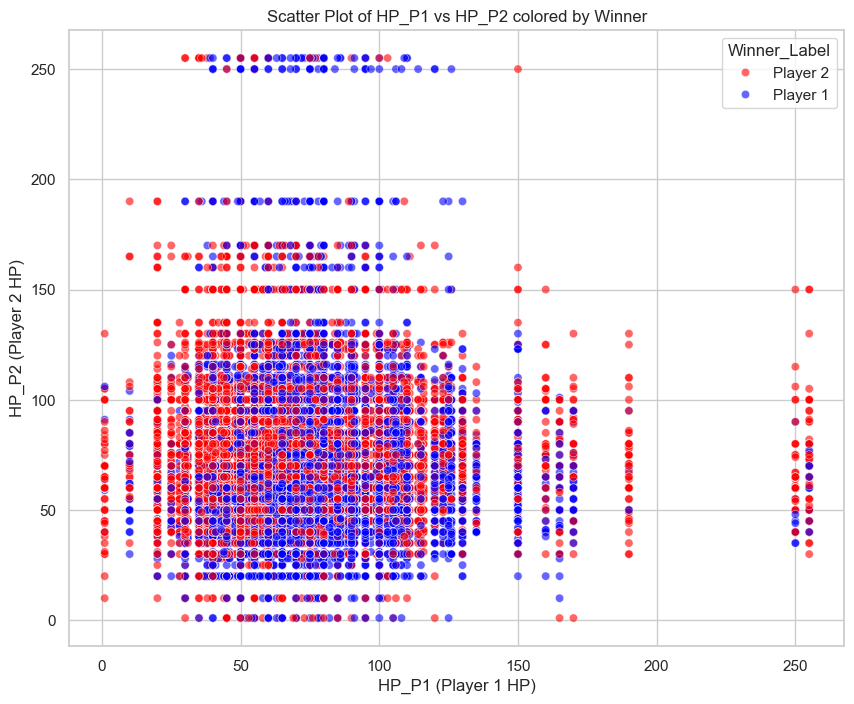

In [9]:

# Drop rows where 'Winner' is missing
df_clean = df.dropna(subset=['Winner'])

# Determine the winner label (Player 1 or Player 2)
def get_winner_label(row):
    if row['Winner'] == row['First_pokemon']:
        return 'Player 1'
    elif row['Winner'] == row['Second_pokemon']:
        return 'Player 2'
    else:
        return 'Draw/Unknown'

df_clean['Winner_Label'] = df_clean.apply(get_winner_label, axis=1)

# Set up the plotting style
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df_clean, 
    x='HP_P1', 
    y='HP_P2', 
    hue='Winner_Label', 
    alpha=0.6,
    palette={'Player 1': 'blue', 'Player 2': 'red', 'Draw/Unknown': 'grey'}
)

# Add labels and title
plt.title('Scatter Plot of HP_P1 vs HP_P2 colored by Winner')
plt.xlabel('HP_P1 (Player 1 HP)')
plt.ylabel('HP_P2 (Player 2 HP)')

plt.show()

**1. Đọc hiểu biểu đồ**

Quan sát: Bạn có thể thấy các điểm màu Xanh (P1 thắng) và Đỏ (P2 thắng) nằm trộn lẫn vào nhau rất nhiều. Ngay cả ở những khu vực mà Pokemon 1 có lượng máu vượt trội (phía dưới bên phải biểu đồ), vẫn xuất hiện rất nhiều chấm đỏ (tức là P1 dù nhiều máu hơn vẫn thua). Ngược lại, P2 nhiều máu hơn vẫn có thể thua (các chấm xanh ở phía trên bên trái).

Kết luận: HP cao không đảm bảo chiến thắng. Một Pokemon máu giấy nhưng tốc độ cao và đòn đánh mạnh vẫn có thể hạ gục đối thủ nhiều máu.

**2. Khả năng phân tách tuyến tính**

Quan sát: Không thể kẻ một đường thẳng đơn giản nào trên biểu đồ này để chia tách rạch ròi hai vùng Thắng/Thua.

Ý nghĩa đối với mô hình: Nếu bạn chỉ dùng chỉ số HP hoặc một chỉ số bất kỳ để train, mô hình sẽ thất bại (Underfitting). Điều này khẳng định chúng ta bắt buộc phải kết hợp thêm các chỉ số khác như Attack, Defense, Speed và đặc biệt là Type (khắc hệ) để dự đoán chính xác.

**3. Phân bố**

Quan sát: Đa số các điểm dữ liệu tập trung dày đặc ở góc dưới bên trái, tương ứng với mức HP khoảng từ 50 đến 100.

Ngoại lệ (Outliers): Có một số ít điểm vọt lên rất cao (HP > 200). Những điểm ngoại lai này có thể gây nhiễu nếu mô hình không được xử lý tốt.

## WINRATE BASED ON POKEMON CATEGORIES

In [ ]:
df_clean = df.dropna(subset=['Winner']).copy() # Nên dùng .copy() để tránh warning
df_clean['P1_won'] = df_clean['Winner'] == df_clean['First_pokemon']

# Initialize counters
leg_wins = 0
leg_total = 0
non_leg_wins = 0
non_leg_total = 0

# Check P1
leg_p1_mask = df_clean['Legendary_P1'] == True  
leg_total += leg_p1_mask.sum()
leg_wins += (leg_p1_mask & df_clean['P1_won']).sum()

non_leg_p1_mask = df_clean['Legendary_P1'] == False
non_leg_total += non_leg_p1_mask.sum()
non_leg_wins += (non_leg_p1_mask & df_clean['P1_won']).sum()

# Check P2
leg_p2_mask = df_clean['Legendary_P2'] == True 
leg_total += leg_p2_mask.sum()
leg_wins += (leg_p2_mask & (~df_clean['P1_won'])).sum()

non_leg_p2_mask = df_clean['Legendary_P2'] == False 
non_leg_total += non_leg_p2_mask.sum()
non_leg_wins += (non_leg_p2_mask & (~df_clean['P1_won'])).sum()

# Calculate rates
leg_winrate = leg_wins / leg_total if leg_total > 0 else 0
non_leg_winrate = non_leg_wins / non_leg_total if non_leg_total > 0 else 0

print(f"Legendary Winrate: {leg_winrate:.2%} ({leg_wins}/{leg_total})")
print(f"Non-Legendary Winrate: {non_leg_winrate:.2%} ({non_leg_wins}/{non_leg_total})")

Legendary Winrate: 77.94% (6400/8211)
Non-Legendary Winrate: 47.51% (43855/92299)


Quá trình này bắt đầu bằng việc loại bỏ các trận đấu không có kết quả (df.dropna(subset=['Winner'])), xử lý các dòng bị thiếu giá trị trong cột Winner để chỉ tính trên các trận đấu đã hoàn thành. Sau khi có bảng dữ liệu sạch (df_clean), chương trình xác định kết quả của từng trận đấu bằng cách tạo cột P1_won (True nếu Pokemon 1 thắng). Cuối cùng, code tiến hành phân loại và đếm: nó tạo ra các bộ lọc (mask) để tách riêng các trận đấu có sự tham gia của Pokemon Legendary và Non-Legendary (ở cả vị trí P1 và P2). Bằng cách sử dụng các bộ lọc này, chương trình cộng dồn tổng số trận đấu và tổng số trận thắng của từng loại Pokemon. Bước cuối cùng là chia tổng số trận thắng cho tổng số trận đấu (leg_wins / leg_total) để cho ra tỷ lệ thắng thực tế của từng nhóm.

C:\Users\tuann\AppData\Local\Temp\ipykernel_9684\1550895399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Category', y='Winrate', data=winrate_df, palette='viridis')


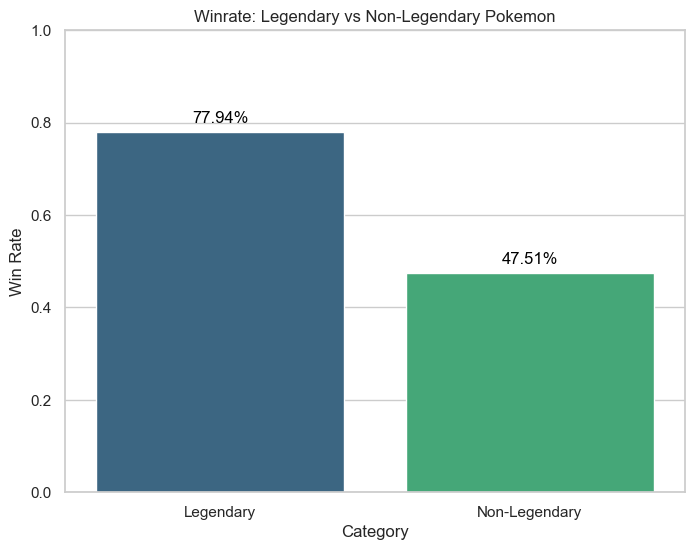

In [13]:
# Prepare data for plotting
data = {
    'Category': ['Legendary', 'Non-Legendary'],
    'Winrate': [leg_winrate, non_leg_winrate]
}
winrate_df = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Category', y='Winrate', data=winrate_df, palette='viridis')

# Add title and labels
plt.title('Winrate: Legendary vs Non-Legendary Pokemon')
plt.ylabel('Win Rate')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for percentage

# Add text labels on bars
for index, row in winrate_df.iterrows():
    barplot.text(index, row['Winrate'] + 0.02, f"{row['Winrate']:.2%}", color='black', ha="center")

plt.show()

Tỷ lệ thắng của Pokemon Huyền thoại ($77.94\%$) áp đảo rõ rệt so với Pokemon Thường ($47.51\%$), khẳng định rằng thuộc tính Legendary tương đương với sức mạnh vượt trội trong chiến đấu. Sự khác biệt lớn này là hợp lý theo thiết kế trò chơi, nhưng việc Pokemon Thường vẫn thắng gần một nửa số trận cho thấy trận đấu không chỉ hoàn toàn dựa vào chỉ số mà còn phụ thuộc vào các yếu tố chiến thuật quan trọng khác như Hệ khắc chế (Type Advantage), tạo cơ hội cho những trận đấu kịch tính và khó đoán.